MAIN
1. split main task into stages
2. epoch motor planning (-500, 500) around 20
3. epoch motor execution (-500, 500) around movement onset


In [1]:
import mne
import os
from utils import check_paths
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
%matplotlib qt

# PLANNING

**GROUP**

Epoching

?? save metadata and planning events ??

In [ ]:
# set EEG data path, group, task and subject
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
sub_name = 's1_pac_sub26' # specify the subject you want to analyse 's1_pac_sub52'

preproc_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc')
filt_dir = os.path.join(preproc_dir, 'filt')
analysis_dir = os.path.join(preproc_dir, 'analysis')
task = '_MAIN'

eeg_data_path = os.path.join(analysis_dir, f'{sub_name}{task}_reconst.fif')
raw = mne.io.read_raw_fif(eeg_data_path, preload=True)

# Open events from pickle file
with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
    events = pickle.load(pickle_file)

In [37]:
sf = raw.info['sfreq']

In [ ]:
# extract time stamps (in samples) from the events[0] array for key in events[1] dict
bl_start_sample = events[0][events[0][:, 2] == events[1]['baseline']] 
adapt_start_sample = events[0][events[0][:, 2] == events[1]['adapt1']]
adapt_finish_sample = events[0][events[0][:, 2] == events[1]['postadapt']]

In [ ]:
# convert time stamps from sample to seconds
bl_start_time = bl_start_sample[0, 0] / sf
adapt_start_time = adapt_start_sample[0, 0] / sf
adapt_finish_time = adapt_finish_sample[0, 0] / sf

print(f'''baseline block: {bl_start_time}-{adapt_start_time} sec ~ {(adapt_start_time-bl_start_time)/60:.2f} min
adaptation block: {adapt_start_time}-{adapt_finish_time} sec ~ {(adapt_finish_time-adapt_start_time)/60:.2f} min''')


baseline block: 234.17-669.354 sec ~ 7.25 min
adaptation block: 669.354-1996.568 sec ~ 22.12 min


In [56]:
# crop raw file into segments: baseline block and adaptation block
bl_raw = raw.copy().crop(tmin=(bl_start_time-1), tmax=(adapt_start_time+1)) # add and subtract 1 to catch start and end events
adapt_raw = raw.copy().crop(tmin=(adapt_start_time-1), tmax=(adapt_finish_time+1))

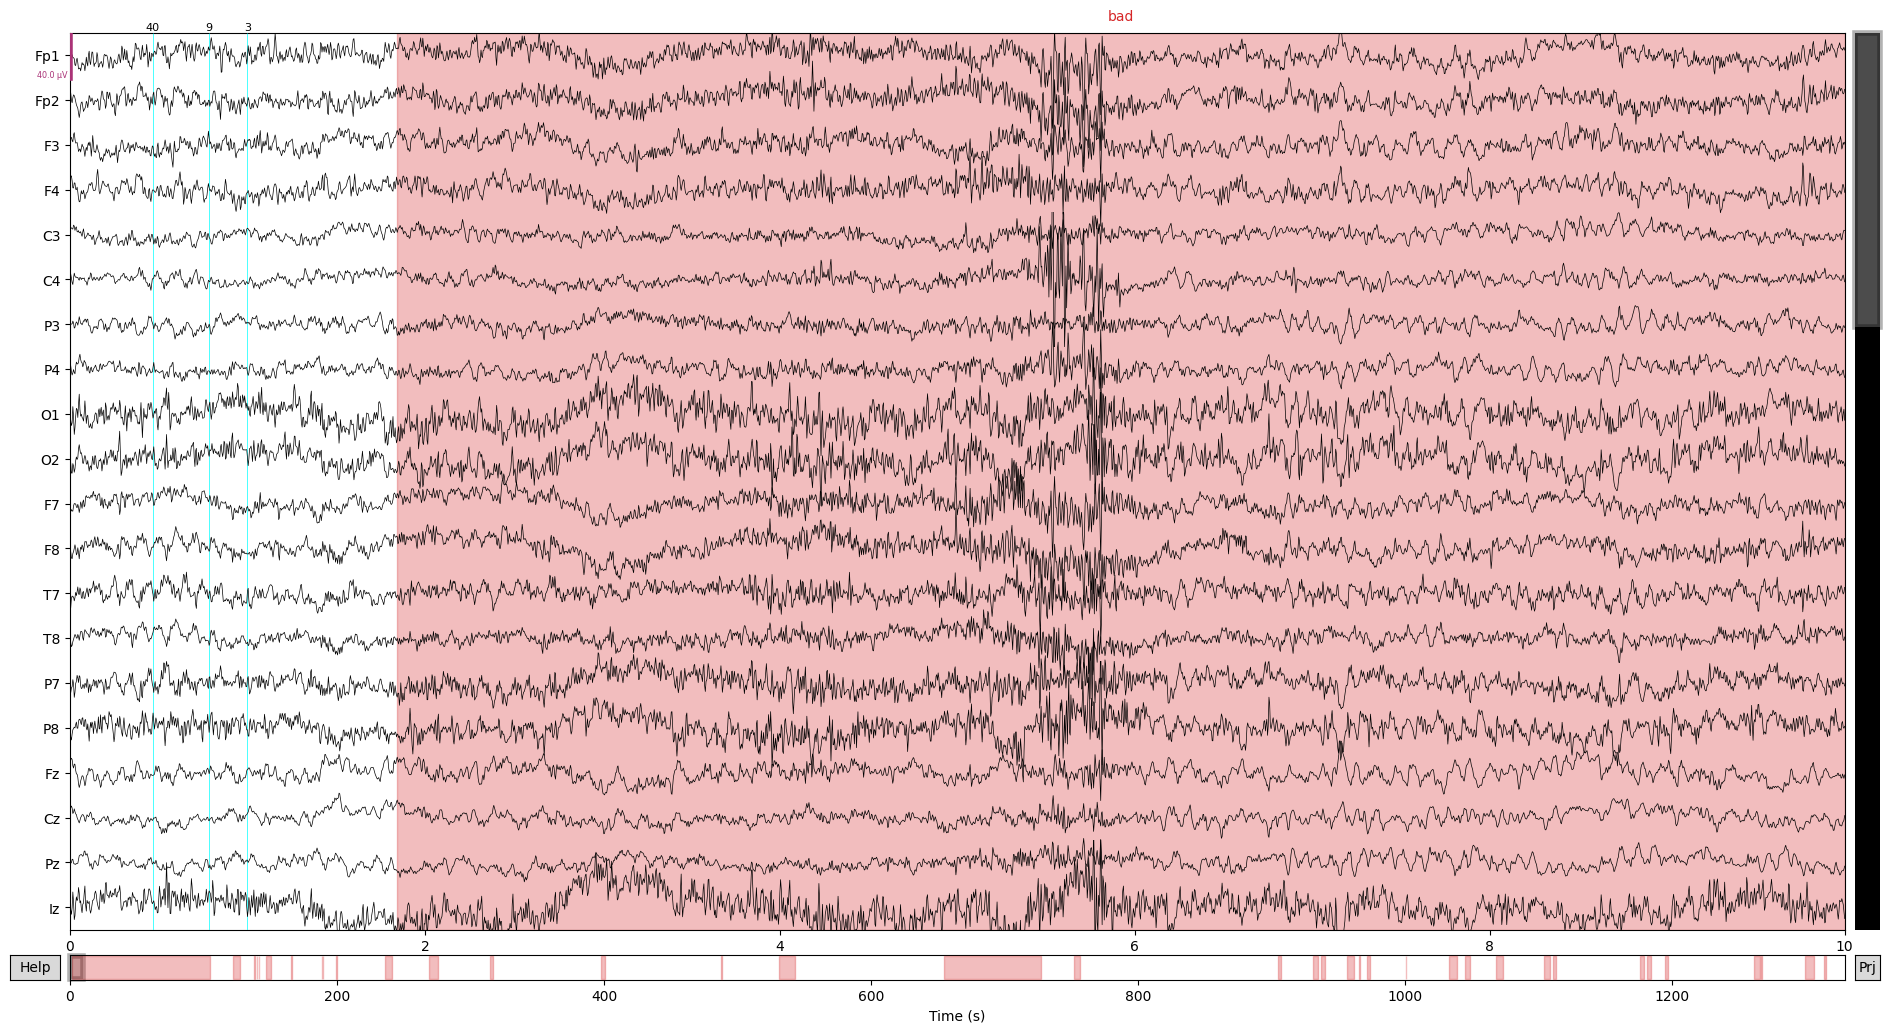

Channels marked as bad:
none


In [66]:
adapt_raw.plot(events=events[0])

In [68]:
events[0][:2]

array([[    0,     0,     0],
       [49957,     0,     1]], dtype=int32)

In [ ]:
min()

In [72]:
events[0][10,2]

np.int32(77)

In [129]:
diff = []
for i in range(len(events[0])):
    if events[0][i,2] == 8 and events[0][i-1,2] == 9:
        # print(events[0][i,0] - events[0][i-1,0])
        diff.append(events[0][i,0] - events[0][i-1,0])

diff_sec = np.array([i/sf for i in diff])
diff_sec

array([ 2.182,  0.202,  2.18 ,  2.184,  0.202,  0.2  ,  2.18 ,  2.182,
        0.2  ,  0.202,  0.202,  0.2  , 65.736,  2.182,  0.2  ,  0.2  ,
        0.2  ,  0.202,  0.2  ,  0.2  ,  0.2  ,  0.2  ,  0.2  ,  0.2  ,
        0.2  ,  0.2  ,  0.2  ,  0.202,  0.2  ,  0.2  ,  0.202,  0.2  ,
        0.2  ,  0.2  ,  0.202,  0.202,  0.2  ,  0.2  ,  2.182,  0.2  ,
        0.2  ,  0.2  ,  0.202,  2.182,  0.2  ,  2.182,  0.2  ,  0.2  ,
        0.2  ,  0.2  ,  0.202,  0.2  ,  0.2  ,  2.18 ,  0.2  ,  0.202,
        2.18 ,  0.2  ,  0.202,  2.182,  0.2  ,  0.2  ,  0.2  ,  0.2  ,
        0.2  ,  0.2  ,  0.2  ,  0.202,  0.202,  0.202,  0.2  ,  0.2  ,
        2.182,  0.2  ,  0.2  ,  0.2  ,  0.2  ,  0.202,  0.202,  0.2  ,
        0.2  ,  2.18 ,  0.2  ,  0.2  ,  0.2  ,  2.182,  0.2  ,  0.2  ,
        0.202,  0.2  ,  0.2  ,  2.18 ,  0.202,  0.2  ,  0.2  ,  2.18 ,
        2.182,  0.2  ,  0.202,  0.202,  0.2  ,  0.202,  0.2  ,  2.18 ,
        2.182,  0.202,  0.202,  0.2  ,  2.18 ,  0.2  ,  0.2  ,  0.2  ,
      

In [ ]:
new_events = events[0][events[0][:, 0] > int(diff_sec.mean()*sf)]

In [ ]:
events[0][events[0][:, 0] > int(diff_sec.mean()*sf)]

array([[  24393,       0,       1],
       [  24669,       0,       8],
       [  30288,       0,      20],
       ...,
       [1626328,       0,      40],
       [1626487,       0,       9],
       [1628998,       0,       0]], dtype=int32)

In [118]:
diff_sec.min()

np.float64(0.198)

In [132]:
np.where(diff_sec == diff_sec.max())[0]

array([12])

In [135]:
events[0][12]

array([35649,     0,     8], dtype=int32)

In [120]:
diff_sec.mean()

np.float64(0.5290880829015545)

In [88]:
events[1]

{'0, Impedance': 0,
 'prac': 1,
 'bad_early': 111,
 'baseline': 2,
 'target_on': 20,
 'adapt1': 3,
 'go_on': 30,
 'adapt2': 4,
 'reach_end': 40,
 'postadapt': 5,
 'deadapt1': 6,
 'deadapt2': 7,
 'bad_late': 77,
 'trial_start': 8,
 'trial_end': 9}

In [142]:
os.listdir(subs_dir)[6:]

['s1_pac_sub22',
 's1_pac_sub24',
 's1_pac_sub26',
 's1_pac_sub28',
 's1_pac_sub29',
 's1_pac_sub32',
 's1_pac_sub33',
 's1_pac_sub38',
 's1_pac_sub52',
 's1_pac_sub66',
 's1_sub04_KS']

In [ ]:
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
task = '_MAIN' # ['_BL', '_MAIN']
task_stage = '_go' # '_plan' or '_go'

subs_dir = os.path.join(eeg_data_dir, group)
figs_dir = os.path.join(eeg_data_dir, 'figures', group, 'epochs', task)
check_paths(figs_dir)

# metadata for each epoch shall include events from the range: [-0.5, 0.7] s,
# i.e. starting with stimulus onset and expanding beyond the end of the epoch
metadata_tmin, metadata_tmax = -0.5, 0.7 # [-0.5, 0.7] or [-0.5, 0.5]

# events of interest
row_events = ['go_on'] # ['target_on'] or ['go_on']

# timing of the epochs
epochs_tmin, epochs_tmax = -0.5, 0.7  # epochs range: [-0.5, 0.7] or [-0.5, 0.5]
baseline_epo = (epochs_tmin, epochs_tmax)


for sub_name in os.listdir(subs_dir): # os.listdir(subs_dir) OR ['s1_pac_sub00'] # EXCLUDED sub19 - no baseline trigger

    if sub_name == 's1_pac_sub19': # EXCLUDED sub19 - no baseline trigger
        continue
    else:
        print(f'Creating epochs for {task} task in {sub_name}...')

        preproc_dir = os.path.join(subs_dir, sub_name, 'preproc')
        filt_dir = os.path.join(subs_dir, sub_name, 'preproc', 'filt')
        analysis_dir = os.path.join(preproc_dir, 'analysis')

        eeg_data_path = os.path.join(analysis_dir, f'{sub_name}{task}_reconst.fif')
        raw = mne.io.read_raw_fif(eeg_data_path, preload=True)
        sf = raw.info['sfreq'] # sampling frequency of data

        # Open events from pickle file
        with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
            events_raw = pickle.load(pickle_file)

        # check if event time samples are unique
        for i in range(len(events_raw[0]) - 1):
            if events_raw[0][i, 0] == events_raw[0][i+1, 0]:
                print(f'Time sample for events_raw {events_raw[0][i, 2]} and {events_raw[0][i+1, 2]} in trials {i}-{i+1} are not unique!')
                events_raw[0][i+1, 0] = events_raw[0][i, 0] + 1


        # extract time stamps (in samples) from the events_raw[0] array for key in events_raw[1] dict
        bl_start_sample = events_raw[0][events_raw[0][:, 2] == events_raw[1]['baseline']] 
        adapt_start_sample = events_raw[0][events_raw[0][:, 2] == events_raw[1]['adapt1']]
        adapt_finish_sample = events_raw[0][events_raw[0][:, 2] == events_raw[1]['postadapt']]
        
        # convert time stamps from sample to seconds
        bl_start_time = bl_start_sample[0, 0] / sf
        adapt_start_time = adapt_start_sample[0, 0] / sf
        adapt_finish_time = adapt_finish_sample[0, 0] / sf

        print(f'''baseline block: {bl_start_time}-{adapt_start_time} sec ~ {(adapt_start_time-bl_start_time)/60:.2f} min
        adaptation block: {adapt_start_time}-{adapt_finish_time} sec ~ {(adapt_finish_time-adapt_start_time)/60:.2f} min''')

        # crop raw file into segments: baseline block and adaptation block
        bl_raw = raw.copy().crop(tmin=(bl_start_time-1), tmax=(adapt_start_time+1)) # add and subtract 1 to catch start and end events
        adapt_raw = raw.copy().crop(tmin=(adapt_start_time-1), tmax=(adapt_finish_time+1))


        for block_raw in [bl_raw, adapt_raw]:

            if block_raw == bl_raw:
                block_name = '_baseline'
            else:
                block_name = '_adaptation'

            # auto-create metadata:
            # this also returns a new events array and an event_id dictionary. we'll see
            # later why this is important
            metadata, events, event_id = mne.epochs.make_metadata(
                events=events_raw[0],
                event_id=events_raw[1],
                tmin=metadata_tmin,
                tmax=metadata_tmax,
                sfreq=sf,
                row_events=row_events
            )

            epochs = mne.Epochs(
                raw=block_raw,
                tmin=epochs_tmin,
                tmax=epochs_tmax,
                events=events,
                event_id=event_id,
                baseline=baseline_epo,
                detrend=None,
                metadata=metadata,
                reject_by_annotation=True,
                preload=True,
            )

            if 'bad_late' in events_raw[1]:
                epochs = epochs["trial_start.isna() & bad_early.isna() & bad_late.isna()"]
            else:
                epochs = epochs["trial_start.isna() & bad_early.isna()"]
            print(f'TOTAL NUMBER OF EPOCHS: {len(epochs)}')

            # Save the epochs
            epochs.save(os.path.join(analysis_dir, f"{sub_name}{task}_epochs{task_stage}{block_name}-epo.fif"), overwrite=True)
            print(f'Epochs for {task}_{block_name} in {sub_name} saved SUCCESSFULLY')

            # Plot ERP
            fig_erp = epochs.average().plot(gfp=True, spatial_colors=True)
            # Save the ERP plot
            fig_erp.savefig(os.path.join(figs_dir, f"{sub_name}{task}{task_stage}{block_name}_erp_plot.png"), dpi=300)


            spectrum = epochs.compute_psd()
            bands = {'Theta (4-8 Hz)': (4, 8),
                    'Alpha (8-12 Hz)': (8, 12),
                    'Beta (12-30 Hz)': (12, 30),
                    'Gamma (30-50 Hz)': (30, 50),
                    'High gamma (50-80 Hz)': (50, 80)}

            fig_psd = spectrum.plot_topomap(bands=bands, vlim="joint", normalize=True)
            fig_psd.savefig(os.path.join(figs_dir, f"{sub_name}{task}{task_stage}{block_name}_psd_topomap.png"), dpi=300)

            print(f'Figures for {sub_name} saved SUCCESSFULLY')

            plt.close('all')

In [27]:
metadata

event_name  0, Impedance  prac  bad_early  baseline  target_on  adapt1  \
4         go_on           NaN   NaN        NaN       NaN        NaN     NaN   
9         go_on           NaN   NaN        NaN       NaN        NaN     NaN   
17        go_on           NaN   NaN        NaN       NaN     -0.468     NaN   
22        go_on           NaN   NaN        NaN       NaN        NaN     NaN   
27        go_on           NaN   NaN        NaN       NaN        NaN     NaN   
...         ...           ...   ...        ...       ...        ...     ...   
2674      go_on           NaN   NaN        NaN       NaN        NaN     NaN   
2679      go_on           NaN   NaN        NaN       NaN        NaN     NaN   
2684      go_on           NaN   NaN        NaN       NaN     -0.116     NaN   
2693      go_on           NaN   NaN        NaN       NaN        NaN     NaN   
2698      go_on           NaN   NaN        NaN       NaN     -0.150     NaN   

      go_on  adapt2  reach_end  postadapt  deadapt1  deadapt2  trial_start  \
4       0.0     NaN      0.368        NaN       NaN       NaN          NaN   
9       0.0     NaN      0.384        NaN       NaN       NaN          NaN   
17      0.0     NaN      0.550        NaN       NaN       NaN          NaN   
22      0.0     NaN      0.434        NaN       NaN       NaN          NaN   
27      0.0     NaN        NaN        NaN       NaN       NaN          NaN   
...     ...     ...        ...        ...       ...       ...          ...   
2674    0.0     NaN      0.402        NaN       NaN       NaN          NaN   
2679    0.0     NaN      0.666        NaN       NaN       NaN          NaN   
2684    0.0     NaN      0.466        NaN       NaN       NaN          NaN   
2693    0.0     NaN      0.332        NaN       NaN       NaN          NaN   
2698    0.0     NaN      0.516        NaN       NaN       NaN          NaN   

      trial_end  
4           NaN  
9          0.70  
17          NaN  
22          NaN  
27          NaN  
...         ...  
2674        NaN  
2679        NaN  
2684        NaN  
2693       0.65  
2698        NaN  

[520 rows x 15 columns]

In [28]:
metadata['trial_start'].mean()

nan

In [29]:
metadata['reach_end'].mean()

np.float64(0.3931894093686354)

In [30]:
metadata['reach_end'].min()

np.float64(0.25)

In [31]:
metadata['reach_end'].max()

np.float64(0.7)

Time-frequency

In [ ]:
task_stage = '_go' # '_plan' or '_go'
baseline_tf = (-0.5, -0.1)

for sub_name in os.listdir(subs_dir): # os.listdir(subs_dir) OR ['s1_pac_sub00']

    if sub_name == 's1_pac_sub19': # EXCLUDED sub19 - no baseline trigger
        continue
    else:
        print(f'Creating TF maps for {task} task in {sub_name}...')

        preproc_dir = os.path.join(subs_dir, sub_name, 'preproc')
        analysis_dir = os.path.join(preproc_dir, 'analysis')


        for block_name in ['_baseline', '_adaptation']:
            epochs_data_path = os.path.join(analysis_dir, f'{sub_name}{task}_epochs{task_stage}{block_name}-epo.fif')
            epochs = mne.read_epochs(epochs_data_path, preload=True)

            freqs = np.logspace(*np.log10([4, 80]), num=40)
            n_cycles = freqs / 2.0  # different number of cycle per frequency
            power, itc = epochs.compute_tfr(
                method="morlet",
                freqs=freqs,
                n_cycles=n_cycles,
                average=True,
                return_itc=True,
                decim=3,
            )
            power.apply_baseline(baseline=baseline_tf, mode="zscore")

            # Save time-freq analysis output
            power.save(os.path.join(analysis_dir, f"{sub_name}{task}{task_stage}{block_name}_power-tfr.h5"), overwrite=True)
            itc.save(os.path.join(analysis_dir, f"{sub_name}{task}{task_stage}{block_name}_itc-tfr.h5"), overwrite=True)

            # plot ITC and Power
            itc_fig = itc.plot(combine='mean', title=f'Target-reaching task: {task_stage}{block_name}. ITC')[0]
            power_all_fig = power.plot(mode="zscore", title='Averaged Power Across Channels', combine='mean')[0]
            power_motor_fig = power.plot(picks=['C1', 'C3', 'C5'], mode="zscore", title='Averaged Power Across C1-5 Channels', combine='mean')[0]

            # save ITC and Power plots
            itc_fig.savefig(os.path.join(figs_dir, 'TFR', f"{sub_name}{task}{task_stage}{block_name}_itc.png"), dpi=300)
            power_all_fig.savefig(os.path.join(figs_dir, 'TFR', f"{sub_name}{task}{task_stage}{block_name}_power_all.png"), dpi=300)
            power_motor_fig.savefig(os.path.join(figs_dir, 'TFR', f"{sub_name}{task}{task_stage}{block_name}_power_motor.png"), dpi=300)

            plt.close('all')

In [83]:
power.plot(baseline=(-0.5,-0.1), mode="logratio", title='Averaged Power Across Channels', combine='mean')[0]
power.plot(baseline=(-0.5,-0.1), mode="zscore", title='Averaged Power Across Channels', combine='mean')[0]

Applying baseline correction (mode: logratio)
Applying baseline correction (mode: zscore)


TF group

In [88]:
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
task = '_MAIN' # ['_BL', '_MAIN']
task_stage = '_go' # '_plan' or '_go'
block_name = '_adaptation' # ['_baseline', '_adaptation']
subs_dir = os.path.join(eeg_data_dir, group)

all_epochs = []

for sub_name in os.listdir(subs_dir): # os.listdir(subs_dir) OR ['s1_pac_sub00']

    if sub_name == 's1_pac_sub19': # EXCLUDED sub19 - no baseline trigger
        continue
    else:
        preproc_dir = os.path.join(subs_dir, sub_name, 'preproc')
        analysis_dir = os.path.join(preproc_dir, 'analysis')

        epochs_data_path = os.path.join(analysis_dir, f'{sub_name}{task}_epochs{task_stage}{block_name}-epo.fif')
        epochs = mne.read_epochs(epochs_data_path, preload=True)
        all_epochs.append(epochs)

epochs_all_subs = mne.concatenate_epochs(all_epochs)

group_save_path = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set\\Y group'
epochs_all_subs.save((os.path.join(group_save_path, f"ALL_subs{task}_epochs{task_stage}{block_name}_ALL-epo.fif")), overwrite=True)

Reading D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_pac_sub01\preproc\analysis\s1_pac_sub01_MAIN_epochs_go_adaptation-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -500.00 ...     700.00 ms
        0 CTF compensation matrices available
Adding metadata with 15 columns
184 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Reading D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_pac_sub05\preproc\analysis\s1_pac_sub05_MAIN_epochs_go_adaptation-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -500.00 ...     700.00 ms
        0 CTF compensation matrices available
Adding metadata with 16 columns
122 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1

C:\Users\a1902989\AppData\Local\Temp\ipykernel_12444\2270352355.py:22: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_all_subs = mne.concatenate_epochs(all_epochs)
d:\BonoKat\research project\# study 1\venv\Lib\site-packages\mne\epochs.py:4608: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metadata = pd.concat(metadata)


Adding metadata with 16 columns
2835 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
Overwriting existing file.
Overwriting existing file.


In [91]:
group_save_path = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set\\Y group'
group = 'Y'
sub_name = 'ALL_subs'
task = '_MAIN' # ['_BL', '_MAIN']
task_stage = '_go' # '_plan' or '_go'
block_name = '_baseline' # ['_baseline', '_adaptation']

figs_dir = os.path.join('D:\\BonoKat\\research project\\# study 1\\eeg_data\\set\\figures', group, 'epochs', task, 'TFR', block_name)
check_paths(figs_dir)

epochs_all_subs = mne.read_epochs(os.path.join(group_save_path, f"{sub_name}{task}_epochs{task_stage}{block_name}_ALL-epo.fif"), preload=True)
epochs_all_subs

Reading D:\BonoKat\research project\# study 1\eeg_data\set\Y group\ALL_subs_MAIN_epochs_go_baseline_ALL-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -500.00 ...     700.00 ms
        0 CTF compensation matrices available
Adding metadata with 16 columns
933 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<EpochsFIF | 933 events (all good), -0.5 – 0.7 s (baseline -0.5 – -0.1 s), ~261.0 MB, data loaded, with metadata,
 'go_on': 933>

In [ ]:
freqs = np.logspace(*np.log10([4, 80]), num=40)
n_cycles = freqs / 2.0  # different number of cycle per frequency
baseline_tf = (-0.5, -0.1)

power, itc = epochs_all_subs.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    average=True,
    return_itc=True,
    decim=3,
)
power.apply_baseline(baseline=baseline_tf, mode="zscore")

# Save time-freq analysis output
power.save(os.path.join(group_save_path, f"{sub_name}{task}{task_stage}{block_name}_power-tfr.h5"), overwrite=True)
itc.save(os.path.join(group_save_path, f"{sub_name}{task}{task_stage}{block_name}_itc-tfr.h5"), overwrite=True)

# plot ITC and Power
itc_fig = itc.plot(combine='mean', title=f'Target-reaching task: {task_stage}{block_name}. ITC', cmap='magma')[0]
power_all_fig = power.plot(mode="zscore", title=f'Target-reaching task: {task_stage}{block_name}. Averaged Power', combine='mean', cmap='magma')[0]

# save ITC and Power plots
itc_fig.savefig(os.path.join(figs_dir, f"{sub_name}{task}{task_stage}{block_name}_itc.png"), dpi=300)
power_all_fig.savefig(os.path.join(figs_dir, f"{sub_name}{task}{task_stage}{block_name}_power_all.png"), dpi=300)

# plt.close('all')


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    8.7s


Applying baseline correction (mode: zscore)
Overwriting existing file.
Overwriting existing file.
No baseline correction applied
No baseline correction applied


_______________________

PAC

In [66]:
import numpy as np
from scipy.io import loadmat

from tensorpac import Pac, EventRelatedPac, PreferredPhase
from tensorpac.utils import PeakLockedTF, PSD, ITC, BinAmplitude

In [160]:
epochs_all_subs

<EpochsArray | 703 events (all good), -0.5 – 0.5 s (baseline -0.5 – -0.1 s), ~164.0 MB, data loaded, with metadata,
 'target_on': 703>

In [4]:
group_save_path = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set\\Y group'
sub_name = 'ALL_subs'
block_name = '_adaptation' # ['_baseline', '_adaptation']
epochs_all_subs = mne.read_epochs(os.path.join(group_save_path, f"{sub_name}{task}_epochs{task_stage}{block_name}_ALL-epo.fif"), preload=True)
epochs_all_subs

Reading D:\BonoKat\research project\# study 1\eeg_data\set\Y group\ALL_subs_MAIN_epochs_plan_adaptation_ALL-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Adding metadata with 16 columns
1985 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<EpochsFIF | 1985 events (all good), -0.5 – 0.5 s (baseline -0.5 – -0.1 s), ~462.9 MB, data loaded, with metadata,
 'target_on': 1985>

In [183]:
# set freqs for PAC analysis
width, step = 3, .2
theta = [3, 9]
alpha = [6, 14]
gamma_set = (30, 80, 2, 0.5)

In [184]:
# Extract only EEG channel names from the Epochs object
eeg_channel_names = epochs_all_subs.copy().pick("eeg").ch_names
print(eeg_channel_names)


['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Iz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'CPz', 'POz', 'Oz']


In [185]:
sf = epochs_all_subs.info['sfreq']  # Sampling frequency
times = epochs_all_subs.times

In [186]:
pac_figs_dir = os.path.join(eeg_data_dir, 'figures', 'PAC', task, block_name)
check_paths(pac_figs_dir)

In [ ]:
for i in range(len(eeg_channel_names)):
    # Load the data from an MNE Epochs object (e.g., shape: epochs x channels x time)
    data = epochs_all_subs.pick("eeg").get_data()[:,i,:]  # Shape: (n_epochs, n_channels, n_times)

    print(f"DATA: (n_trials, n_times)={data.shape}; SAMPLING FREQUENCY={sf}Hz; "
        f"TIME VECTOR: n_times={len(times)}")
    
    # MEAN RAW data from the electrode - plot
    fig = plt.figure(figsize=(8, 6))
    plt.plot(times, data.mean(0))
    plt.autoscale(axis='x', tight=True)
    plt.title(f"Mean raw data across trials of {eeg_channel_names[i]} electrode", fontsize=18)
    plt.xlabel('Times (in seconds)', fontsize=15)
    plt.ylabel('V', fontsize=15)

    fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_mean_raw_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_mean_raw_{eeg_channel_names[i]}.fig"), dpi=300, bbox_inches='tight')
    plt.close(fig)

    # inter-trial coherence (ITC) ans power spectrum density (PSD) - plots
    itc = ITC(data, sf, f_pha=(2, 30, 1, .2), dcomplex='wavelet')
    ax = itc.plot(times=times, cmap='plasma', fz_labels=15, fz_title=18)
    ax.set_title(f"ITC Plot_{eeg_channel_names[i]}", fontsize=18)
    fig = ax.get_figure()  # Get the parent figure from the Axes object
    fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_ITC_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_ITC_{eeg_channel_names[i]}.fig"), dpi=300, bbox_inches='tight')
    plt.close(fig)

    psd = PSD(data, sf)
    ax = psd.plot()
    ax.set_title(f"PSD Plot_{eeg_channel_names[i]}", fontsize=18)
    fig = ax.get_figure()
    fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_PSD_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
    fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_PSD_{eeg_channel_names[i]}.fig"), dpi=300, bbox_inches='tight')
    plt.close(fig)

    for j in [theta, alpha]:
        print(j)

        if j == theta:
            phase_name = 'theta'
        else:
            phase_name = 'alpha'

        # Event-related PAC - plot
        rp_obj = EventRelatedPac(f_pha=j, f_amp=gamma_set)
        erpac = rp_obj.filterfit(sf, data, method='gc', smooth=100)

        plt.figure(figsize=(8, 6))
        ax = rp_obj.pacplot(erpac.squeeze(), times, rp_obj.yvec, xlabel='Time',
                    ylabel='Amplitude frequency (Hz)',
                    title=f'{eeg_channel_names[i]}: Event-Related PAC {phase_name}-gamma',
                    fz_labels=15, fz_title=18)
        fig = ax.get_figure()
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_ERPac_{phase_name}_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_ERPac_{phase_name}_{eeg_channel_names[i]}.fig"), dpi=300, bbox_inches='tight')
        plt.close(fig)

        # time-frequency map based on phase peak - plot
        peak = PeakLockedTF(data, sf, cue=0., times=times, f_pha=j, f_amp=gamma_set)
        plt.figure(figsize=(8, 8))
        ax = peak.plot(zscore=True, baseline=(0, 250), cmap='Spectral_r',
                            vmin=-1, vmax=2)[0]
        plt.title(f'{eeg_channel_names[i]}: Peak-locked TF: {phase_name}-gamma')
        plt.tight_layout()
        fig = ax.get_figure()
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_peak_lockedTF_{phase_name}_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_peak_lockedTF_{phase_name}_{eeg_channel_names[i]}.fig"), dpi=300, bbox_inches='tight')
        plt.close(fig)


        # # PAC for planning
        # j[:] = [*j, width, step]
        phase = tuple((*j, width, step))
        print(phase)

        p_obj = Pac(idpac=(6, 0, 0), f_pha=phase, f_amp=gamma_set)
        # extract all of the phases and amplitudes
        pha_p = p_obj.filter(sf, data, ftype='phase')
        amp_p = p_obj.filter(sf, data, ftype='amplitude')

        # define time indices where planning is defined
        time_all = slice(250, 500)

        # define phase / amplitude during planning
        pha_prep, amp_prep = pha_p[..., time_all], amp_p[..., time_all]

        # compute PAC inside planning
        pac_prep = p_obj.fit(pha_prep, amp_prep).mean(-1)

        vmax = np.max(pac_prep.max())
        kw = dict(vmax=vmax, vmin=.04, cmap='viridis')
        plt.figure(figsize=(8, 6))
        ax = p_obj.comodulogram(pac_prep, title="PAC Planning", **kw)
        fig = ax.get_figure()
        plt.ylabel('')
        plt.tight_layout()
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_PAC_plan_{phase_name}_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_PAC_plan_{phase_name}_{eeg_channel_names[i]}.fig"), dpi=300, bbox_inches='tight')
        plt.close(fig)


        # # STATISTICS
        # using the Gaussian-Copula PAC but this time, we also select the method
        # for computing the permutations
        p_obj.idpac = (6, 2, 0)
        # compute pac and 200 surrogates
        pac_prep = p_obj.fit(pha_p[..., time_all], amp_p[..., time_all], n_perm=200,
                             random_state=0)
        # get the p-values
        mcp = 'maxstat'
        pvalues = p_obj.infer_pvalues(p=0.05, mcp=mcp)

        # sphinx_gallery_thumbnail_number = 7
        plt.figure(figsize=(8, 6))
        title = (f'''Significant {phase_name}-gamma coupling\n
                 occurring during the motor planning phase\n
                 (p<0.05, {mcp}-corrected for multiple comparisons''')

        # plot the non-significant pac in gray
        pac_prep_ns = pac_prep.mean(-1).copy()
        pac_prep_ns[pvalues < .05] = np.nan
        p_obj.comodulogram(pac_prep_ns, cmap='gray', vmin=np.nanmin(pac_prep_ns),
                           vmax=np.nanmax(pac_prep_ns), colorbar=False)
        
        # plot the significant pac in color
        pac_prep_s = pac_prep.mean(-1).copy()
        pac_prep_s[pvalues >= .05] = np.nan
        ax = p_obj.comodulogram(pac_prep_s, cmap='Spectral_r', vmin=np.nanmin(pac_prep_s),
                           vmax=np.nanmax(pac_prep_s), title=title)
        plt.gca().invert_yaxis()
        fig = ax.get_figure()
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_PAC_STATS_{phase_name}_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_PAC_STATS_{phase_name}_{eeg_channel_names[i]}.fig"), dpi=300, bbox_inches='tight')
        plt.close(fig)



In [5]:
epochs_all_subs.plot_sensors(show_names=True, ch_groups='selection')

In [14]:
# Use the info from your epochs
info = epochs_all_subs.info

fig = epochs_all_subs.plot_sensors(show_names=True, ch_groups='selection')

# Customize font size of sensor labels
for text in fig.axes[0].texts:  # Access all text elements in the axes
    text.set_fontsize(16)  # Set the font size to your preference

plt.show()

_________________________________

**SINGLE SUB**

In [ ]:
# set EEG data path, group, task and subject
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
sub_name = 's1_pac_sub01' # specify the subject you want to analyse 's1_pac_sub52'

preproc_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc')
filt_dir = os.path.join(preproc_dir, 'filt')
analysis_dir = os.path.join(preproc_dir, 'analysis')
task = '_BL'

eeg_data_path = os.path.join(analysis_dir, f'{sub_name}{task}_reconst.fif')
raw = mne.io.read_raw_fif(eeg_data_path, preload=True)

# Open events from pickle file
with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
    events = pickle.load(pickle_file)

# check if event time samples are unique
for i in range(len(events[0]) - 1):
    if events[0][i, 0] == events[0][i+1, 0]:
        print(f'Time sample for events {events[0][i, 2]} and {events[0][i+1, 2]} in trials {i}-{i+1} are not unique!')
        events[0][i+1, 0] = events[0][i, 0] + 1


In [ ]:
events[1].keys()

dict_keys(['0, Impedance', 'new_trial', 'start_instr', 'break_instr', 'finish_instr', 'prepare', 'isi1', 'go', 'isi2', 'key_press'])

In [ ]:
# metadata for each epoch shall include events from the range: [0.0, 1.5] s,
# i.e. starting with stimulus onset and expanding beyond the end of the epoch
metadata_tmin, metadata_tmax = -0.5, 1

# events of interest
row_events = ['prepare']

# auto-create metadata:
# this also returns a new events array and an event_id dictionary. we'll see
# later why this is important
metadata, events_plan, event_id_plan = mne.epochs.make_metadata(
    events=events[0],
    event_id=events[1],
    tmin=metadata_tmin,
    tmax=metadata_tmax,
    sfreq=raw.info["sfreq"],
    row_events=row_events
)

# let's look at what we got!
metadata

event_name  0, Impedance  new_trial  break_instr  finish_instr  prepare  \
2      prepare           NaN     -0.060          NaN           NaN      0.0   
8      prepare           NaN     -0.016          NaN           NaN      0.0   
14     prepare           NaN     -0.016          NaN           NaN      0.0   
20     prepare           NaN     -0.016          NaN           NaN      0.0   
26     prepare           NaN     -0.016          NaN           NaN      0.0   
..         ...           ...        ...          ...           ...      ...   
687    prepare           NaN     -0.018          NaN           NaN      0.0   
693    prepare           NaN     -0.016          NaN           NaN      0.0   
699    prepare           NaN     -0.018          NaN           NaN      0.0   
705    prepare           NaN     -0.016          NaN           NaN      0.0   
711    prepare           NaN     -0.016          NaN           NaN      0.0   

     isi1  go  isi2  key_press  
2     NaN NaN   NaN        NaN  
8     NaN NaN   NaN        NaN  
14    NaN NaN   NaN        NaN  
20    NaN NaN   NaN        NaN  
26    NaN NaN   NaN        NaN  
..    ...  ..   ...        ...  
687   NaN NaN   NaN        NaN  
693   NaN NaN   NaN        NaN  
699   NaN NaN   NaN        NaN  
705   NaN NaN   NaN        NaN  
711   NaN NaN   NaN        NaN  

[119 rows x 10 columns]

In [ ]:
epochs_tmin, epochs_tmax = -0.5, 0.5  # epochs range: [-0.1, 0.4] s
baseline = (epochs_tmin, -0.1)

epochs_plan = mne.Epochs(
    raw=raw,
    tmin=epochs_tmin,
    tmax=epochs_tmax,
    events=events_plan,
    event_id=event_id_plan,
    baseline=baseline,
    metadata=metadata,
    reject_by_annotation=True,
    preload=True,
)

Adding metadata with 10 columns
119 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 119 events and 501 original time points ...
20 bad epochs dropped


In [ ]:
epochs_plan = epochs_plan["go.isna() & isi2.isna() & key_press.isna()"]
epochs_plan

<Epochs | 99 events (all good), -0.5 – 0.5 s (baseline -0.5 – -0.1 s), ~23.2 MB, data loaded, with metadata,
 'prepare': 99>

In [ ]:
epochs_plan.plot(events=events[0], n_channels=64)

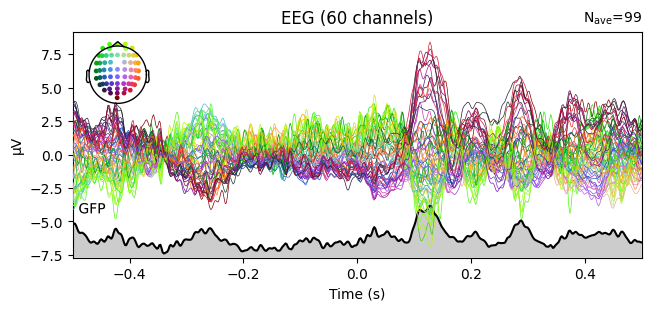

In [ ]:
epochs_plan.average().plot(gfp=True, spatial_colors=True)

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting amplitude spectral density (dB=True).
Averaging across epochs before plotting...
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...


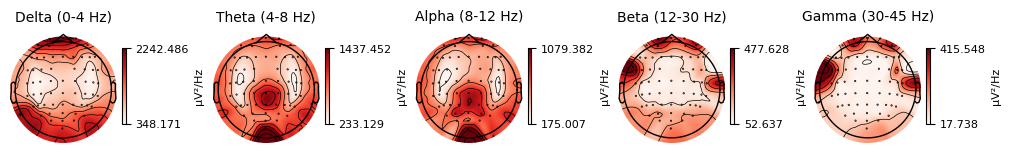

In [ ]:
epochs_plan.compute_psd().plot(exclude="bads", amplitude=True)

spectrum = epochs_plan.compute_psd()
spectrum.plot_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...


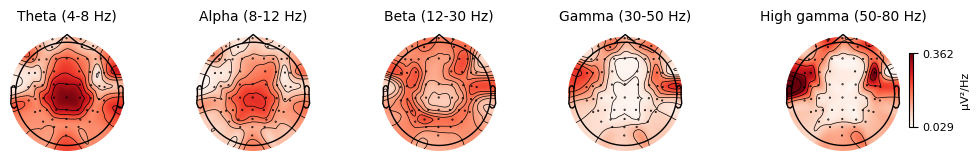

In [ ]:
spectrum = epochs_plan.compute_psd()
bands = {'Theta (4-8 Hz)': (4, 8),
         'Alpha (8-12 Hz)': (8, 12),
         'Beta (12-30 Hz)': (12, 30),
         'Gamma (30-50 Hz)': (30, 50),
         'High gamma (50-80 Hz)': (50, 80)}

spectrum.plot_topomap(bands=bands, vlim="joint", normalize=True)

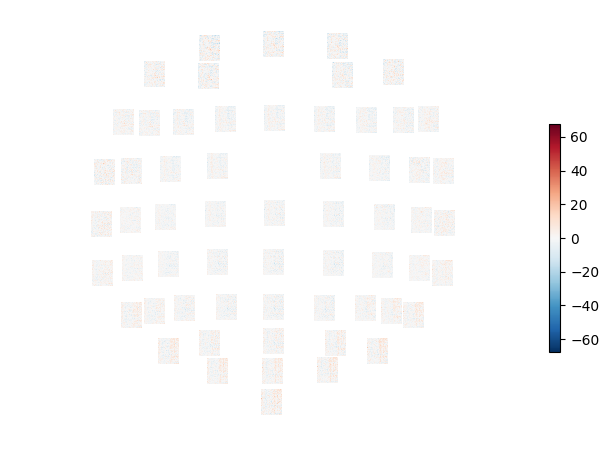

In [ ]:
layout = mne.channels.find_layout(epochs_plan.info, ch_type="eeg")
epochs_plan.plot_topo_image(
    layout=layout, fig_facecolor="w", font_color="k", sigma=1
)

In [ ]:
epo_alpha = epochs_plan.copy().filter(l_freq=8, h_freq=12, n_jobs=-1)
epo_beta = epochs_plan.copy().filter(l_freq=12, h_freq=30, n_jobs=-1)

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 825 samples (1.650 s)



C:\Users\a1902989\AppData\Local\Temp\ipykernel_31684\3699951318.py:1: RuntimeWarning: filter_length (825) is longer than the signal (501), distortion is likely. Reduce filter length or filter a longer signal.
  epo_alpha = epochs_plan.copy().filter(l_freq=8, h_freq=12, n_jobs=-1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1786 tasks      | elapsed:    3.2s


Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 551 samples (1.102 s)



[Parallel(n_jobs=-1)]: Done 5484 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5940 out of 5940 | elapsed:    3.4s finished
C:\Users\a1902989\AppData\Local\Temp\ipykernel_31684\3699951318.py:2: RuntimeWarning: filter_length (551) is longer than the signal (501), distortion is likely. Reduce filter length or filter a longer signal.
  epo_beta = epochs_plan.copy().filter(l_freq=12, h_freq=30, n_jobs=-1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 5532 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 5940 out of 5940 | elapsed:    0.3s finished


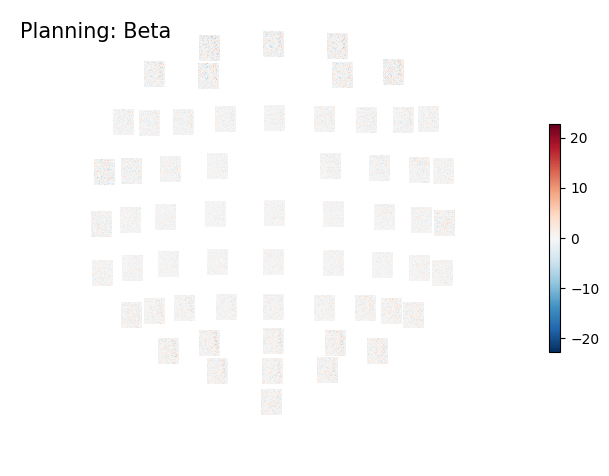

In [ ]:
epo_alpha["prepare"].plot_topo_image(
    layout=layout, fig_facecolor="w", font_color="k", sigma=1,
    title='Planning: Alpha'
)
epo_beta["prepare"].plot_topo_image(
    layout=layout, fig_facecolor="w", font_color="k", sigma=1,
    title='Planning: Beta'
)

__________________________

TIME-FREQUENCY

In [ ]:
freqs = np.logspace(*np.log10([4, 80]), num=40)
n_cycles = freqs / 2.0  # different number of cycle per frequency
power, itc = epochs_plan.compute_tfr(
    method="morlet",
    freqs=freqs,
    n_cycles=n_cycles,
    average=True,
    return_itc=True,
    decim=3,
)

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


In [ ]:
itc.plot(combine='mean', baseline=baseline)

In [ ]:
power.plot(baseline=baseline, mode="logratio", title='Averaged Power Across Channels', combine='mean')
power.plot(picks=['C1', 'C3', 'C5'], baseline=baseline, mode="logratio", title='Averaged Power Across C1-5 Channels', combine='mean')

----------------------

PAC DRAFTS

In [ ]:
import numpy as np
from scipy.io import loadmat

from tensorpac import Pac, EventRelatedPac, PreferredPhase
from tensorpac.utils import PeakLockedTF, PSD, ITC, BinAmplitude


my data

In [ ]:
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
task = '_BL' # ['_BL', '_MAIN']
task_stage = '_plan' # '_plan' or 'go'

subs_dir = os.path.join(eeg_data_dir, group)
figs_dir = os.path.join(eeg_data_dir, 'figures', group, 'epochs', task, task_stage)
check_paths(figs_dir)

sub_name = 's1_pac_sub01'

preproc_dir = os.path.join(subs_dir, sub_name, 'preproc')
analysis_dir = os.path.join(preproc_dir, 'analysis')

epochs_data_path = os.path.join(analysis_dir, f'{sub_name}{task}_epochs{task_stage}-epo.fif')
epochs = mne.read_epochs(epochs_data_path, preload=True)
epochs


Reading D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_pac_sub07\preproc\analysis\s1_pac_sub07_BL_epochs_plan-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Adding metadata with 10 columns
102 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


<EpochsFIF | 102 events (all good), -0.5 – 0.5 s (baseline -0.5 – -0.1 s), ~23.9 MB, data loaded, with metadata,
 'prepare': 102>

In [ ]:
pac_figs_dir = os.path.join(eeg_data_dir, 'figures', 'PAC')
check_paths(pac_figs_dir)

In [ ]:
# Load the data from an MNE Epochs object (e.g., shape: epochs x channels x time)
data = epochs.pick("eeg").get_data()[:,4,:]  # Shape: (n_epochs, n_channels, n_times) C3
# data = np.mean(epochs.get_data(), axis=1)
sf = epochs.info['sfreq']  # Sampling frequency
times = epochs.times

# Initialize PAC object
# pac = Pac(idpac=(1, 2, 3), f_pha=(2, 12, 1), f_amp=(20, 80, 5), dcomplex='wavelet')

print(f"DATA: (n_trials, n_times)={data.shape}; SAMPLING FREQUENCY={sf}Hz; "
      f"TIME VECTOR: n_times={len(times)}")

DATA: (n_trials, n_times)=(99, 501); SAMPLING FREQUENCY=500.0Hz; TIME VECTOR: n_times=501


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(times, data.mean(0))
plt.autoscale(axis='x', tight=True)
plt.title("Mean raw data across trials of C3 electrode", fontsize=18)
plt.xlabel('Times (in seconds)', fontsize=15)
plt.ylabel('V', fontsize=15)

Text(0, 0.5, 'V')

In [ ]:
itc = ITC(data, sf, f_pha=(2, 20, 1, .2), dcomplex='wavelet')

Inter-Trials Coherence (ITC)
    extracting 85 phases


In [ ]:
itc.plot(times=times, cmap='plasma', fz_labels=15, fz_title=18)
plt.show()

In [ ]:
psd = PSD(data, sf)
psd.plot()

In [ ]:
rp_obj = EventRelatedPac(f_pha=[8, 12], f_amp=(30, 80, 2, 0.5))
erpac = rp_obj.filterfit(sf, data, method='gc', smooth=100)

In [ ]:
plt.figure(figsize=(8, 6))
rp_obj.pacplot(erpac.squeeze(), times, rp_obj.yvec, xlabel='Time',
               ylabel='Amplitude frequency (Hz)',
               title='Event-Related PAC theta-gamma',
               fz_labels=15, fz_title=18)

plt.show()

In [ ]:
peak = PeakLockedTF(data, sf, cue=0., times=times, f_pha=[8, 12],
                    f_amp=(30, 80, 2, 0.5))

In [ ]:
plt.figure(figsize=(8, 8))
ax_1, ax_2 = peak.plot(zscore=True, baseline=(0, 250), cmap='Spectral_r',
                       vmin=-1, vmax=2)
plt.title('Peak-locked TF: theta-gamma')
plt.tight_layout()
plt.show()

rest vs plan

In [ ]:
p_obj = Pac(idpac=(6, 0, 0), f_pha=(3, 9, 2, .1), f_amp=(30, 80, 2, 0.5))
# extract all of the phases and amplitudes
pha_p = p_obj.filter(sf, data, ftype='phase')
amp_p = p_obj.filter(sf, data, ftype='amplitude')
# define time indices where rest, planning and execution are defined
time_rest = slice(0, 250)
time_prep = slice(250, 500)

# define phase / amplitude during rest / planning / execution
pha_rest, amp_rest = pha_p[..., time_rest], amp_p[..., time_rest]
pha_prep, amp_prep = pha_p[..., time_prep], amp_p[..., time_prep]

# compute PAC inside rest, planning, and execution
pac_rest = p_obj.fit(pha_rest, amp_rest).mean(-1)
pac_prep = p_obj.fit(pha_prep, amp_prep).mean(-1)


Phase Amplitude Coupling object defined
    true PAC estimation using Gaussian Copula PAC (gcPac)
    true PAC estimation using Gaussian Copula PAC (gcPac)


In [ ]:
vmax = np.max([pac_rest.max(), pac_prep.max()])
kw = dict(vmax=vmax, vmin=.04, cmap='viridis')
plt.figure(figsize=(14, 4))
plt.subplot(121)
p_obj.comodulogram(pac_rest, title="PAC Rest [-0.5, 0]s", **kw)
plt.subplot(122)
p_obj.comodulogram(pac_prep, title="PAC Planning [0, 0.5]s", **kw)
plt.ylabel('')
plt.tight_layout()
plt.show()

stats

In [ ]:
# still using the Gaussian-Copula PAC but this time, we also select the method
# for computing the permutations
p_obj.idpac = (6, 2, 0)
# compute pac and 200 surrogates
pac_prep = p_obj.fit(pha_p[..., time_prep], amp_p[..., time_prep], n_perm=200,
                     random_state=0)
# get the p-values
mcp = 'maxstat'
pvalues = p_obj.infer_pvalues(p=0.05, mcp=mcp)

    true PAC estimation using Gaussian Copula PAC (gcPac)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=0)
    infer p-values at (p=0.05, mcp=maxstat)
    infer p-values at (p=0.05, mcp=maxstat)


In [ ]:
# sphinx_gallery_thumbnail_number = 7
plt.figure(figsize=(8, 6))
title = (r"Significant theta$\Leftrightarrow$gamma coupling occurring during "
         f"the motor planning phase\n(p<0.05, {mcp}-corrected for multiple "
          "comparisons)")
# plot the non-significant pac in gray
pac_prep_ns = pac_prep.mean(-1).copy()
pac_prep_ns[pvalues < .05] = np.nan
p_obj.comodulogram(pac_prep_ns, cmap='gray', vmin=np.nanmin(pac_prep_ns),
                   vmax=np.nanmax(pac_prep_ns), colorbar=False)
# plot the significant pac in color
pac_prep_s = pac_prep.mean(-1).copy()
pac_prep_s[pvalues >= .05] = np.nan
p_obj.comodulogram(pac_prep_s, cmap='Spectral_r', vmin=np.nanmin(pac_prep_s),
                   vmax=np.nanmax(pac_prep_s), title=title)
plt.gca().invert_yaxis()
plt.show()

C:\Users\a1902989\AppData\Local\Temp\ipykernel_12828\922743022.py:14: RuntimeWarning: All-NaN slice encountered
  p_obj.comodulogram(pac_prep_s, cmap='Spectral_r', vmin=np.nanmin(pac_prep_s),
C:\Users\a1902989\AppData\Local\Temp\ipykernel_12828\922743022.py:15: RuntimeWarning: All-NaN slice encountered
  vmax=np.nanmax(pac_prep_s), title=title)


____________________________

ALL ELECTRODES & ALL SUBJECTS

In [ ]:
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
task = '_BL' # ['_BL', '_MAIN']
task_stage = '_plan' # '_plan' or 'go'
subs_dir = os.path.join(eeg_data_dir, group)

all_epochs = []

for sub_name in os.listdir(subs_dir): # os.listdir(subs_dir) OR ['s1_pac_sub00']

    preproc_dir = os.path.join(subs_dir, sub_name, 'preproc')
    analysis_dir = os.path.join(preproc_dir, 'analysis')

    epochs_data_path = os.path.join(analysis_dir, f'{sub_name}{task}_epochs{task_stage}-epo.fif')
    epochs = mne.read_epochs(epochs_data_path, preload=True)
    all_epochs.append(epochs)


In [ ]:
len(all_epochs)

17

In [ ]:
epochs_all_subs = mne.concatenate_epochs(all_epochs)
epochs_all_subs

Adding metadata with 12 columns
1743 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)


C:\Users\a1902989\AppData\Local\Temp\ipykernel_15176\1231508276.py:1: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_all_subs = mne.concatenate_epochs(all_epochs)


<EpochsArray | 1743 events (all good), -0.5 – 0.5 s (baseline -0.5 – -0.1 s), ~406.5 MB, data loaded, with metadata,
 'prepare': 1743>

In [ ]:
width, step = 3, .2
theta = [3, 9]
alpha = [6, 14]
gamma_set = (30, 80, 2, 0.5)

In [ ]:
# Extract only EEG channel names from the Epochs object
eeg_channel_names = epochs_all_subs.copy().pick("eeg").ch_names
print(eeg_channel_names)


['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Iz', 'FC1', 'FC2', 'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'F1', 'F2', 'C1', 'C2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'C5', 'C6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'Fpz', 'CPz', 'POz', 'Oz']


In [ ]:
sf = epochs.info['sfreq']  # Sampling frequency
times = epochs.times

In [ ]:
pac_figs_dir = os.path.join(eeg_data_dir, 'figures', 'PAC')
check_paths(pac_figs_dir)

In [ ]:
sub_name = 'ALL_subs'

for i in range(len(eeg_channel_names)):
    # Load the data from an MNE Epochs object (e.g., shape: epochs x channels x time)
    data = epochs_all_subs.pick("eeg").get_data()[:,i,:]  # Shape: (n_epochs, n_channels, n_times)

    print(f"DATA: (n_trials, n_times)={data.shape}; SAMPLING FREQUENCY={sf}Hz; "
        f"TIME VECTOR: n_times={len(times)}")
    
    # MEAN RAW data from the electrode - plot
    fig = plt.figure(figsize=(8, 6))
    plt.plot(times, data.mean(0))
    plt.autoscale(axis='x', tight=True)
    plt.title(f"Mean raw data across trials of {eeg_channel_names[i]} electrode", fontsize=18)
    plt.xlabel('Times (in seconds)', fontsize=15)
    plt.ylabel('V', fontsize=15)

    fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_mean_raw_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
    plt.close(fig)

    # inter-trial coherence (ITC) ans power spectrum density (PSD) - plots
    itc = ITC(data, sf, f_pha=(2, 30, 1, .2), dcomplex='wavelet')
    ax = itc.plot(times=times, cmap='plasma', fz_labels=15, fz_title=18)
    ax.set_title(f"ITC Plot_{eeg_channel_names[i]}", fontsize=18)
    fig = ax.get_figure()  # Get the parent figure from the Axes object
    fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_ITC_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
    plt.close(fig)

    psd = PSD(data, sf)
    ax = psd.plot()
    ax.set_title(f"PSD Plot_{eeg_channel_names[i]}", fontsize=18)
    fig = ax.get_figure()
    fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_PSD_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
    plt.close(fig)

    for j in [theta, alpha]:
        print(j)

        if j == theta:
            phase_name = 'theta'
        else:
            phase_name = 'alpha'

        # Event-related PAC - plot
        rp_obj = EventRelatedPac(f_pha=j, f_amp=gamma_set)
        erpac = rp_obj.filterfit(sf, data, method='gc', smooth=100)

        plt.figure(figsize=(8, 6))
        ax = rp_obj.pacplot(erpac.squeeze(), times, rp_obj.yvec, xlabel='Time',
                    ylabel='Amplitude frequency (Hz)',
                    title=f'{eeg_channel_names[i]}: Event-Related PAC {phase_name}-gamma',
                    fz_labels=15, fz_title=18)
        fig = ax.get_figure()
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_ERPac_{phase_name}_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
        plt.close(fig)

        # time-frequency map based on phase peak - plot
        peak = PeakLockedTF(data, sf, cue=0., times=times, f_pha=j, f_amp=gamma_set)
        plt.figure(figsize=(8, 8))
        ax = peak.plot(zscore=True, baseline=(0, 250), cmap='Spectral_r',
                            vmin=-1, vmax=2)[0]
        plt.title(f'{eeg_channel_names[i]}: Peak-locked TF: {phase_name}-gamma')
        plt.tight_layout()
        fig = ax.get_figure()
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_peak_lockedTF_{phase_name}_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
        plt.close(fig)


        # # PAC for planning
        # j[:] = [*j, width, step]
        phase = tuple((*j, width, step))
        print(phase)

        p_obj = Pac(idpac=(6, 0, 0), f_pha=phase, f_amp=gamma_set)
        # extract all of the phases and amplitudes
        pha_p = p_obj.filter(sf, data, ftype='phase')
        amp_p = p_obj.filter(sf, data, ftype='amplitude')

        # define time indices where planning is defined
        time_all = slice(250, 500)

        # define phase / amplitude during planning
        pha_prep, amp_prep = pha_p[..., time_all], amp_p[..., time_all]

        # compute PAC inside planning
        pac_prep = p_obj.fit(pha_prep, amp_prep).mean(-1)

        vmax = np.max(pac_prep.max())
        kw = dict(vmax=vmax, vmin=.04, cmap='viridis')
        plt.figure(figsize=(8, 6))
        ax = p_obj.comodulogram(pac_prep, title="PAC Planning", **kw)
        fig = ax.get_figure()
        plt.ylabel('')
        plt.tight_layout()
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_PAC_plan_{phase_name}_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
        plt.close(fig)


        # # STATISTICS
        # using the Gaussian-Copula PAC but this time, we also select the method
        # for computing the permutations
        p_obj.idpac = (6, 2, 0)
        # compute pac and 200 surrogates
        pac_prep = p_obj.fit(pha_p[..., time_all], amp_p[..., time_all], n_perm=200,
                             random_state=0)
        # get the p-values
        mcp = 'maxstat'
        pvalues = p_obj.infer_pvalues(p=0.05, mcp=mcp)

        # sphinx_gallery_thumbnail_number = 7
        plt.figure(figsize=(8, 6))
        title = (f'''Significant {phase_name}-gamma coupling\n
                 occurring during the motor planning phase\n
                 (p<0.05, {mcp}-corrected for multiple comparisons''')

        # plot the non-significant pac in gray
        pac_prep_ns = pac_prep.mean(-1).copy()
        pac_prep_ns[pvalues < .05] = np.nan
        p_obj.comodulogram(pac_prep_ns, cmap='gray', vmin=np.nanmin(pac_prep_ns),
                           vmax=np.nanmax(pac_prep_ns), colorbar=False)
        
        # plot the significant pac in color
        pac_prep_s = pac_prep.mean(-1).copy()
        pac_prep_s[pvalues >= .05] = np.nan
        ax = p_obj.comodulogram(pac_prep_s, cmap='Spectral_r', vmin=np.nanmin(pac_prep_s),
                           vmax=np.nanmax(pac_prep_s), title=title)
        plt.gca().invert_yaxis()
        fig = ax.get_figure()
        fig.savefig(os.path.join(pac_figs_dir, f"{sub_name}_PAC_STATS_{phase_name}_{eeg_channel_names[i]}.png"), dpi=300, bbox_inches='tight')
        plt.close(fig)



DATA: (n_trials, n_times)=(1743, 501); SAMPLING FREQUENCY=500.0Hz; TIME VECTOR: n_times=501


Inter-Trials Coherence (ITC)
    extracting 135 phases
Compute PSD over 1743 trials and 501 time points
    Add 95th confidence interval
C:\Users\a1902989\AppData\Local\Temp\ipykernel_15176\1040414770.py:30: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ax = psd.plot()
Event Related PAC object defined
    Extract phases (n_pha=1) and amplitudes (n_amps=96)


[3, 9]


    Compute Gaussian-Copula ERPAC
PeakLockedTF object defined
    align on time-point=0.0 (sample=249)
    extract phase and amplitudes (n_amps=96)
    running peak detection around sample=249
    realign the 1743 phases and amplitudes
Phase Amplitude Coupling object defined


(3, 9, 3, 0.2)


    true PAC estimation using Gaussian Copula PAC (gcPac)
    true PAC estimation using Gaussian Copula PAC (gcPac)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=0)
    infer p-values at (p=0.05, mcp=maxstat)
    infer p-values at (p=0.05, mcp=maxstat)
Event Related PAC object defined
    Extract phases (n_pha=1) and amplitudes (n_amps=96)


[6, 14]


    Compute Gaussian-Copula ERPAC
PeakLockedTF object defined
    align on time-point=0.0 (sample=249)
    extract phase and amplitudes (n_amps=96)
    running peak detection around sample=249
    realign the 1743 phases and amplitudes
Phase Amplitude Coupling object defined


(6, 14, 3, 0.2)


    true PAC estimation using Gaussian Copula PAC (gcPac)
    true PAC estimation using Gaussian Copula PAC (gcPac)
    compute surrogates (Swap amplitude time blocks (Bahramisharif et al. 2013), 200 permutations, random_state=0)


KeyboardInterrupt: 

__________________________

DIRTY FIELD

In [2]:
# set EEG data path, group, task and subject
eeg_data_dir = 'D:\\BonoKat\\research project\\# study 1\\eeg_data\\set'
group = 'Y'
sub_name = 's1_pac_sub26' # specify the subject you want to analyse 's1_pac_sub52'

preproc_dir = os.path.join(eeg_data_dir, group, sub_name, 'preproc')
filt_dir = os.path.join(preproc_dir, 'filt')
analysis_dir = os.path.join(preproc_dir, 'analysis')
task = '_MAIN'

eeg_data_path = os.path.join(analysis_dir, f'{sub_name}{task}_reconst.fif')
raw = mne.io.read_raw_fif(eeg_data_path, preload=True)

# Open events from pickle file
with open(os.path.join(filt_dir, f'{sub_name}{task}_events.pkl'), 'rb') as pickle_file:
    events = pickle.load(pickle_file)


Opening raw data file D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_pac_sub26\preproc\analysis\s1_pac_sub26_MAIN_reconst.fif...


C:\Users\a1902989\AppData\Local\Temp\ipykernel_18660\1628322990.py:12: RuntimeWarning: This filename (D:\BonoKat\research project\# study 1\eeg_data\set\Y\s1_pac_sub26\preproc\analysis\s1_pac_sub26_MAIN_reconst.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(eeg_data_path, preload=True)


    Read a total of 1 projection items:
        Average EEG reference (1 x 60)  idle
    Range : 0 ... 1801463 =      0.000 ...  3602.926 secs
Ready.
Reading 0 ... 1801463  =      0.000 ...  3602.926 secs...


Using matplotlib as 2D backend.


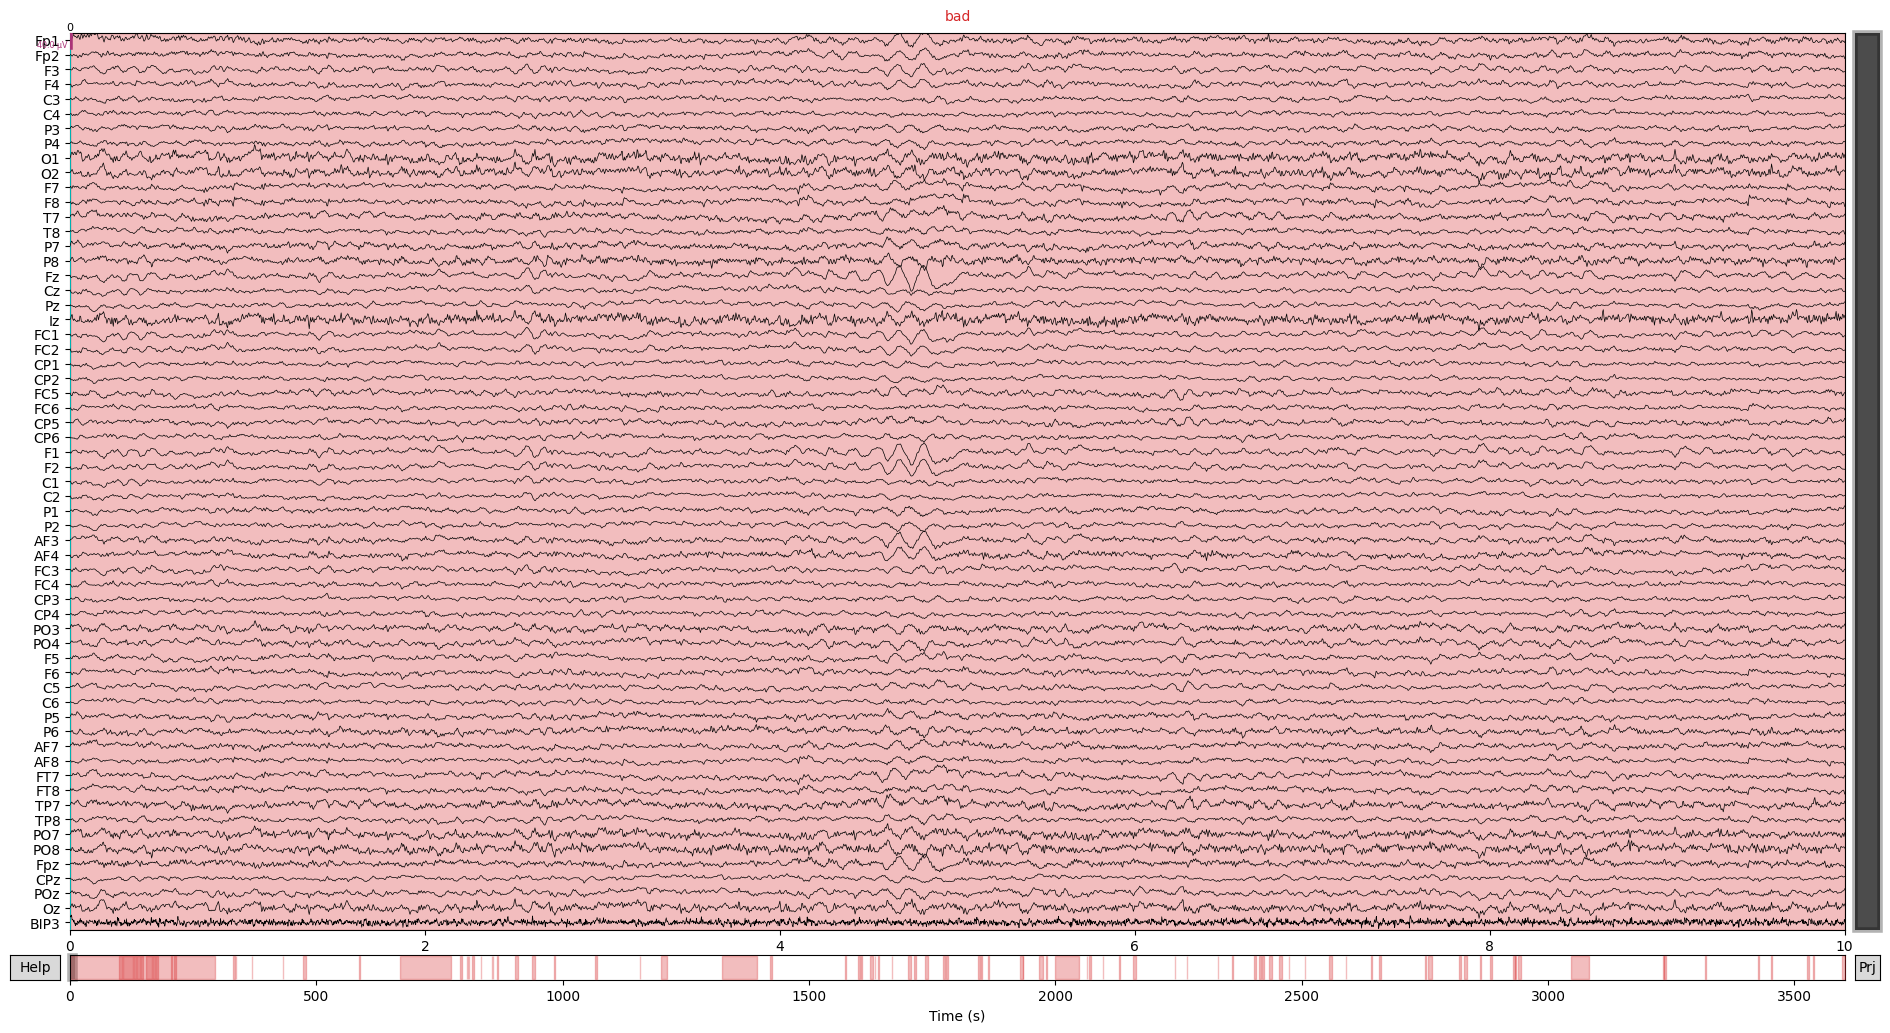

Channels marked as bad:
none


In [3]:
raw.plot(events=events[0], n_channels=64)

In [15]:
planning_idx = np.where(events[0][:, 2] == 20)
planning_events = events[0][planning_idx]
planning_events

array([[  51444,       0,      20],
       [  62677,       0,      20],
       [  66336,       0,      20],
       ...,
       [1791901,       0,      20],
       [1794492,       0,      20],
       [1797167,       0,      20]])

In [16]:
epochs = mne.Epochs(raw, events[0], event_id=20, tmin=-0.5, tmax=0.5, preload=True)
epochs

Not setting metadata
559 matching events found
Setting baseline interval to [-0.5, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 559 events and 501 original time points ...
73 bad epochs dropped


<Epochs |  486 events (all good), -0.5 – 0.5 s, baseline -0.5 – 0 s, ~113.4 MB, data loaded,
 '20': 486>

In [17]:
epochs.plot(events=events[0])

C:\Users\a1902989\AppData\Local\Temp\ipykernel_16248\3670627597.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  epochs.plot(events=events[0])


    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


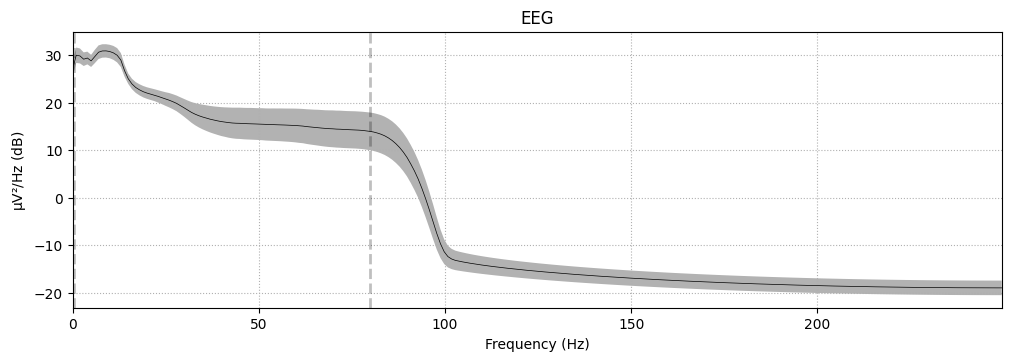

In [18]:
epochs.compute_psd().plot(picks="eeg", exclude="bads", average=True, amplitude=False)

    Using multitaper spectrum estimation with 7 DPSS windows


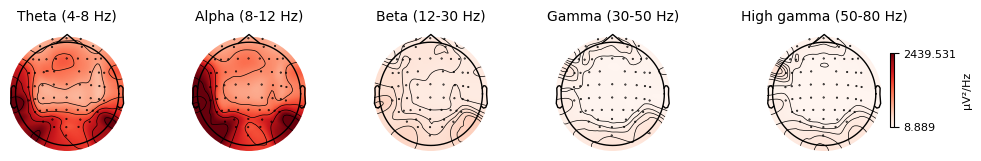

In [19]:
spectrum = epochs.compute_psd()
bands = {'Theta (4-8 Hz)': (4, 8),
         'Alpha (8-12 Hz)': (8, 12),
         'Beta (12-30 Hz)': (12, 30),
         'Gamma (30-50 Hz)': (30, 50),
         'High gamma (50-80 Hz)': (50, 80)}

spectrum.plot_topomap(bands=bands, vlim="joint")

In [24]:
freqs = np.logspace(*np.log10([4, 80]), num=40)
n_cycles = freqs / 2.0  # different number of cycle per frequency
power, itc = tfr_morlet(
    epochs,
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=True,
    decim=3,
    average=True
)
power.plot(baseline=None, mode="logratio", title='Averaged Power Across Channels', combine='mean')

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    4.4s


No baseline correction applied


[<Figure size 640x480 with 2 Axes>]

In [23]:
type(power)

mne.time_frequency.tfr.AverageTFR